In [1]:
import os
import tempfile
import requests
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Using python with the PhotoChemCAD database

**Scott Prahl**

**January 2021**

## Download the current entire PhotochemCAD archive

Store the archive locally so it does not need to be downloaded repeatedly.

In [2]:
url = 'http://www.photochemcad.com/download/PhotochemCAD3.zip'

filename = 'PhotochemCAD3.zip'

if not os.path.isfile(filename):

    r = requests.get(url, allow_redirects=True)
    if not r.ok:
        print("Downloading URL '%s' failed: '%s'" % (url, r.reason))
        exit()

    f = open(filename, 'wb')
    f.write(r.content)
    f.close()

zf = zipfile.ZipFile(filename, 'r')

## Parse the database records

Pandas is extraordinarily good at this.  We leave the database inside the .zip file and just extract a dataframe.

In [3]:
path = 'PhotochemCAD3/PCAD3 Compd Database 2018/'
db_name = '2018_03 PCAD3.db'
df = pd.read_csv(zf.open(path + db_name), encoding='latin_1', sep="\t", index_col=0)

## Find the Riboflavin absorption file

Here we search through the dataframe to find the right row for Riboflavin.  Using `to_dict()` is a super simple way to extract the information in the row so it is in a useful format.  

In [4]:
name = 'Riboflavin'
ribo = df.loc[df['Name']==name].to_dict('records')[0]   # just want the first entry in the array
epsilon = float(ribo['Epsilon'].replace(',',''))        # delete commas and convert to a number
solvent = ribo['Solvent']

## Plot the result

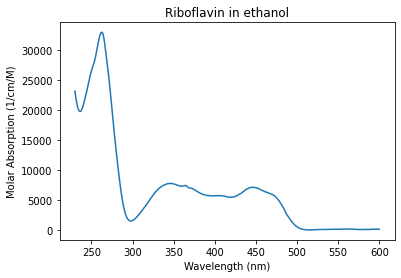

e =  33000 (270 nm) in ethanol (Koziol, 1966), additional references and notes for emission spectra: [(Koziol, 1965) 0.36 in acetone, 0.37 in dioxane, 0.23 in water] [(Sun, 1972) 0.32 in ethanol] 


In [5]:
x,y = np.loadtxt(zf.open(path + ribo['File']), skiprows=1, dtype=float).T
plt.plot(x,y*epsilon)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Molar Absorption (1/cm/M)')
plt.title(name + ' in ' + solvent)
plt.show()

print(ribo['Reference'])

## All the data for this particular spectra

In [6]:
ribo

{'Absorption': nan,
 'Name': 'Riboflavin',
 'Structure': 'F14_83-88-5_Riboflavin.str.tif',
 'Class': 'Biomolecules',
 'File': 'F14_83-88-5_Riboflavin.abs.txt',
 'Wavelength': 263.0,
 'Epsilon': '33,000',
 'Solvent': 'ethanol',
 'Instrument': 'Cary 3',
 'Date': '6/24/1997',
 'Reference': 'e =  33000 (270 nm) in ethanol (Koziol, 1966), additional references and notes for emission spectra: [(Koziol, 1965) 0.36 in acetone, 0.37 in dioxane, 0.23 in water] [(Sun, 1972) 0.32 in ethanol] ',
 'Inv': 'Ruchun A. Fuh',
 'Emission': nan,
 'File.1': 'F14_83-88-5_Riboflavin.ems.txt',
 'Solvent.1': 'ethanol',
 'Quantum Yield': 0.3,
 'Instrument.1': 'Spex FluoroMax',
 'Date.1': '6/24/1997',
 'Reference.1': '0.3 in ethanol (Koziol, 1966), additional references and notes for emission spectra: [(Koziol, 1965) 0.36 in acetone, 0.37 in dioxane, 0.23 in water] [(Sun, 1972) 0.32 in ethanol] ',
 'Inv.1': 'Ruchun A. Fuh',
 'Unnamed: 21': nan}